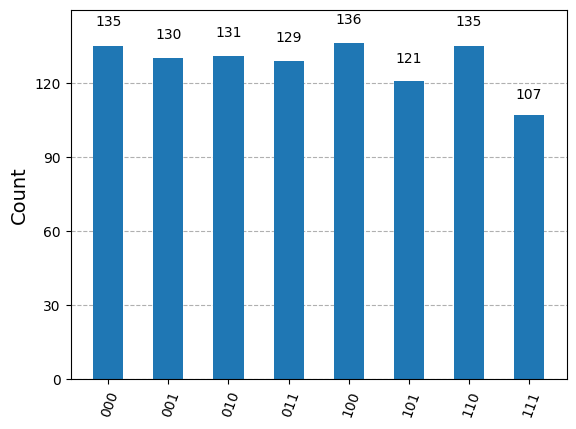

In [23]:
#实现CCZ门
def ccz_gate(cq, tq, circuit):

    # 添加辅助量子比特
    circuit.append(HGate(), [tq], [])
    circuit.append(CXGate(), [cq[0], tq], [])
    circuit.append(CXGate(), [cq[1], tq], [])
    circuit.append(HGate(), [tq], [])
    circuit.append(ZGate(), [tq], [])
    circuit.append(HGate(), [tq], [])
    circuit.append(CXGate(), [cq[1], tq], [])
    circuit.append(CXGate(), [cq[0], tq], [])
    circuit.append(HGate(), [tq], [])
#实现U0
def U0_gate(q, circuit):
    # 定义 U0 操作
    U0_matrix = np.diag([1, -1, -1, -1, -1, -1, -1, -1])
    # 在电路中添加 iI 操作
    circuit.unitary(U0_matrix, q, label='U0')
    
#引入库
import matplotlib.pyplot as plt
import numpy as np
from qiskit.circuit.library import SGate, HGate, XGate, ZGate, CXGate
from qiskit_aer import Aer
from qiskit import transpile
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
#CCZ封装
ccz_circuit = QuantumCircuit(3)
control_qubits = [0, 1]
target_qubit = 2
ccz_gate(control_qubits, target_qubit, ccz_circuit)

# 将电路转换为自定义门
ccz_gate_def = ccz_circuit.to_gate()
ccz_gate_def.name = "CCZ"  # 设置自定义门的名称


#实现G算符
n = 3
G_circuit = QuantumCircuit(n)

#添加CCZ门    
G_circuit.append(ccz_gate_def, [0, 1, 2])
#添加Upsi
for q in [0,1,2]:
    G_circuit.h(q)
    
U0_gate([0,1,2],G_circuit)
    
for q in [0,1,2]:
    G_circuit.h(q)

# 将电路转换为自定义门
G_gate_def = G_circuit.to_gate()
G_gate_def.name = "G"  # 设置自定义门的名称

#grover算法量子线路
grover_circuit = QuantumCircuit(n,n)
for q in [0,1,2]:
    grover_circuit.h(q)
grover_circuit.append(G_gate_def, [0, 1, 2])
grover_circuit.append(G_gate_def, [0, 1, 2])
grover_circuit.draw(output='mpl',filename='grover_circuit.png')
grover_circuit.measure([0, 1, 2], [0, 1, 2])  # 测量所有量子比特

#模拟器运行
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
result = aer_sim.run(transpiled_grover_circuit).result()
counts = result.get_counts(grover_circuit)
plot_histogram(counts)